In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1y7be_o3 because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_name = 'hw1_dataset/train/IMG_2489_jpeg_jpg.rf.ffb357957a29cdef43f3fdfb2a13c417.jpg'
img = plt.imread(file_name)


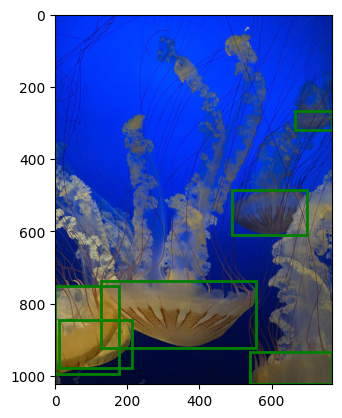

In [7]:
fig, ax = plt.subplots(1)

# Display the image on the axes
ax.imshow(img)

def add_patch(x, y, w, h):
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

add_patch(0, 752, 176, 243)
add_patch(126, 738, 431, 184)
add_patch(10, 845, 202, 133)
add_patch(490, 486, 208, 123)
add_patch(664, 265, 102, 55)
add_patch(541, 933, 226, 90)

# Show the image with the bounding box
plt.show()

# InternImage Model

In [11]:
from transformers import AutoModel

In [15]:
model_name = 'OpenGVLab/internimage_xl_1k_384'
model = AutoModel.from_pretrained(model_name)

# FocalNet

In [3]:
model_path = 'pretrained_models/focalnet_tiny_lrf_cascade_maskrcnn_3x.pth'
model = torch.load(model_path)

In [10]:
model['state_dict']

{'backbone.patch_embed.proj.weight': tensor([[[[ 0.0174,  0.0203, -0.0270, -0.0176],
           [ 0.0217,  0.0464,  0.0259,  0.0107],
           [-0.0162,  0.0187,  0.0181, -0.0199],
           [-0.0577, -0.0411, -0.0334, -0.0116]],
 
          [[ 0.0179,  0.0190, -0.0446, -0.0350],
           [ 0.0393,  0.0759,  0.0406,  0.0188],
           [-0.0221,  0.0371,  0.0413, -0.0047],
           [-0.0664, -0.0368, -0.0125,  0.0084]],
 
          [[-0.0074, -0.0057, -0.0334, -0.0157],
           [-0.0004,  0.0262,  0.0192,  0.0204],
           [-0.0285,  0.0058,  0.0178, -0.0006],
           [-0.0346, -0.0126,  0.0020,  0.0199]]],
 
 
         [[[-0.0101,  0.0576,  0.0501,  0.0164],
           [ 0.0018,  0.0191, -0.0015, -0.0273],
           [ 0.0178,  0.0049, -0.0077, -0.0058],
           [ 0.0082, -0.0418, -0.0529,  0.0009]],
 
          [[-0.0206,  0.0498,  0.0461,  0.0014],
           [ 0.0158,  0.0065, -0.0326, -0.0559],
           [ 0.0441,  0.0245, -0.0180, -0.0157],
           [ 0.052

# MM Detection

In [4]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
import torch
# pytorch = 1.13.0, cuda = 11.6
print(torch.__version__, torch.cuda.is_available())

/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.1+cu116 True


In [2]:
import mmcv
import mmcv.ops

In [9]:
collect_env = mmcv.utils.collect_env()
collect_env

OrderedDict([('sys.platform', 'linux'),
             ('Python', '3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'),
             ('CUDA available', True),
             ('numpy_random_seed', 2147483648),
             ('GPU 0', 'GeForce RTX 2080 Ti'),
             ('CUDA_HOME', '/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1'),
             ('NVCC', 'Cuda compilation tools, release 11.6, V11.6.124'),
             ('GCC', 'gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0'),
             ('PyTorch', '1.13.1+cu116'),
             ('PyTorch compiling details',
              'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.6\n  - NV

In [10]:
from mmdetection.mmdet.apis import init_detector, inference_detector, show_result_pyplot

KeyError: 'CityScapesMetric is already registered in metric at mmdet.evaluation.metrics.cityscapes_metric'

In [11]:
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

ImportError: cannot import name 'show_result_pyplot' from 'mmdet.apis' (/home/guest/r11922a05/anaconda3/envs/cvdpl-hw1/lib/python3.10/site-packages/mmdet/apis/__init__.py)